# Imports

In [1]:
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

from components.params import PARAMS

from components.utils import generar_video_trayectoria

In [2]:
# === Definición del robot usando el modelo de Denavit-Hartenberg (DH) ===
dp = rtb.DHRobot(
    [
        # Primer eslabón (Revolute Joint)
        rtb.RevoluteDH(
            a=PARAMS['A1'],   # Longitud del eslabón (DH)
            m=PARAMS['M1'],   # Masa del eslabón [kg]
            r=PARAMS['R1'],   # Centro de masa relativo al frame del eslabón
            I=PARAMS['I1'],   # Tensor de inercia 
            B=PARAMS['B1'],   # Fricción viscosa [Nm/(rad/s)]
            G=PARAMS['N1']    # Ganancia de transmisión (sin reductor)
        ),
        
        # Segundo eslabón (Revolute Joint)
        rtb.RevoluteDH(
            a=PARAMS['A2'],   # Longitud del eslabón (DH)
            m=PARAMS['M2'],   # Masa del eslabón [kg]
            r=PARAMS['R2'],   # Centro de masa relativo al frame del eslabón
            I=PARAMS['I2'],   # Tensor de inercia 
            B=PARAMS['B2'],   # Fricción viscosa [Nm/(rad/s)]
            G=PARAMS['N2']    # Ganancia de transmisión (sin reductor)
        )
    ],
    gravity=np.array([0, -9.8, 0]),  # Vector de gravedad (en dirección -y)
    name="dp"                        # Nombre del robot
)

# === Mostrar el modelo del robot ===
print(dp)

# === Mostrar parámetros dinámicos del modelo ===
print(dp.dynamics())


DHRobot: dp, 2 joints (RR), dynamics, standard DH parameters
┌─────┬────┬────┬──────┐
│ θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │
├─────┼────┼────┼──────┤
│  q1 │  0 │  1 │ 0.0° │
│  q2 │  0 │  2 │ 0.0° │
└─────┴────┴────┴──────┘

┌──┬──┐
└──┴──┘

┌───────┬────┬──────────────┬────────────────────────────┬────┬───────┬────────┬────┐
│   j   │ m  │      r       │             I              │ Jm │   B   │   Tc   │ G  │
├───────┼────┼──────────────┼────────────────────────────┼────┼───────┼────────┼────┤
│ link1 │  1 │  0.5,  0,  0 │  0,  0,  0.001,  0,  0,  0 │  0 │  0.01 │  0,  0 │  1 │
│ link2 │  2 │  1,  0,  0   │  0,  0,  0.002,  0,  0,  0 │  0 │  0.02 │  0,  0 │  2 │
└───────┴────┴──────────────┴────────────────────────────┴────┴───────┴────────┴────┘

None


✅ Video guardado como 'trayectoria_test1_NoB.mp4'


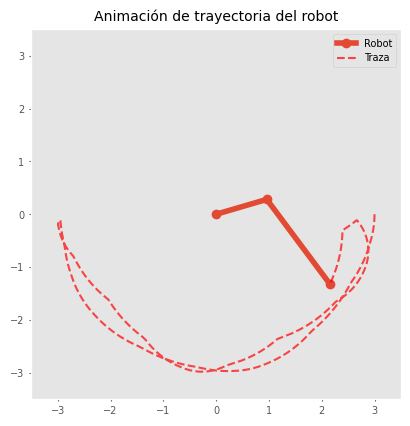

In [3]:
# -----------------------------------------------------------
# Test 1: Sensibilidad a condiciones iniciales - Caso base
# -----------------------------------------------------------
tg = dp.nofriction(coulomb=True, viscous=True).fdyn(
    T=5,
    q0=[0, 0],
    Q=None,  # Sin torque aplicado
    qd0=np.zeros((2,)),
    dt=1e-3
)
generar_video_trayectoria(dp,tg.q, nombre_archivo='trayectoria_test1_NoB.mp4',
                          export_fps=60, sim_dt=tg.t[1]-tg.t[0],l1=PARAMS['A1'],l2=PARAMS['A2'])
